In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = 'J1330_DEIMOS_spectra/*'

In [4]:
spec2d_det3 = []
spec2d_det7 = []

for fl in glob.glob(file_loc):
    if 'clean' in fl:
        if 'det3' in fl:
            spec2d_det3.append(fl)
        elif 'det7' in fl:
            spec2d_det7.append(fl)

In [5]:
spec2d_det3 = sorted(spec2d_det3)
spec2d_det7 = sorted(spec2d_det7)
spec2d_det3, spec2d_det7

(['J1330_DEIMOS_spectra/J1330_deimos_det3_d0613_0086_clean.fits',
  'J1330_DEIMOS_spectra/J1330_deimos_det3_d0613_0087_clean.fits',
  'J1330_DEIMOS_spectra/J1330_deimos_det3_d0614_0085_clean.fits'],
 ['J1330_DEIMOS_spectra/J1330_deimos_det7_d0613_0086_clean.fits',
  'J1330_DEIMOS_spectra/J1330_deimos_det7_d0613_0087_clean.fits',
  'J1330_DEIMOS_spectra/J1330_deimos_det7_d0614_0085_clean.fits'])

In [8]:
spec = spec2d.Spec2d(spec2d_det3[0], hext=1, varext=2)


Loading file J1330_DEIMOS_spectra/J1330_deimos_det3_d0613_0086_clean.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J1330_DEIMOS_spectra/J1330_deimos_det3_d0613_0086_clean.fits (HDU=1)
Final data dimensions (x y): 69 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 69




Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096


Dispersion : 0.630000
Found 68 NaNs in the two-dimensional spectrum
after fixing number of NaNs is 0

sky subtracted and cosmic ray rejected data has been resampled along with vardata in place of the coordinateds whcih rectify the tilted wave image


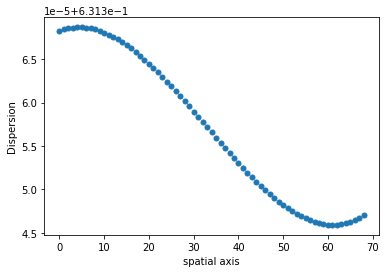

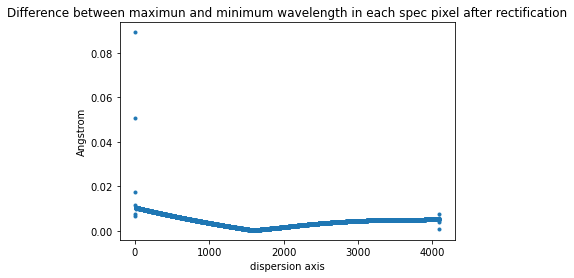

In [9]:
spec.set_dispaxis('y')
spec.do_waverect(doplot=True, resamp_ord=5, outfile='J1330_DEIMOS_spectra/det3_d0613_0086_after_rect.fits')

Profile max value (before normalization) 217.309143


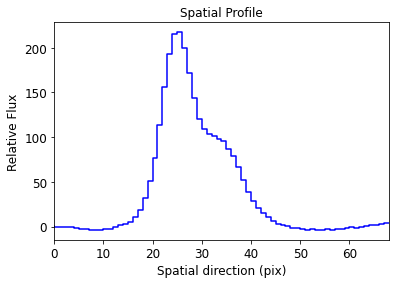

In [17]:
profile = spec.spatial_profile(pixrange=[2100, 2500])

### Need to check slit position with Patrick. However, used -89 deg as slit position and measured distances accordingly and it worked.


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : -1

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 216, 25, 3, 4

amplitude=216.000000, x_0=25.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 80, 33, 3, 4

amplitude=80.000000, x_0=33.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 3 : 10, 38, 3, 4

amplitude=10.000000, x_0=38.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.77902702)>

    [1]: <Moffat1D(amplitude=208.

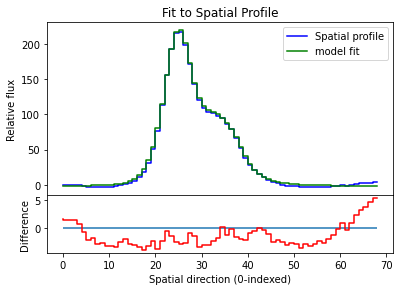

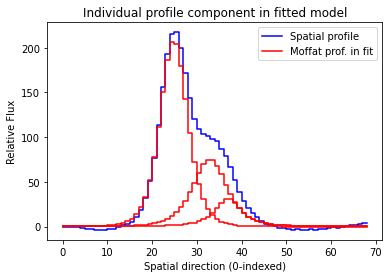


Do you want to start over ? : type yes/no
no


In [31]:
mod0 = spec.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.77902702)>

    [1]: <Moffat1D(amplitude=208.3662898, x_0=25.40628828, gamma=7.53311227, alpha=3.3572023)>

    [2]: <Moffat1D(amplitude=75.43065963, x_0=33.40515058, gamma=7.46943512, alpha=2.27284399)>

    [3]: <Moffat1D(amplitude=31.28987838, x_0=37.5544298, gamma=4.0876574, alpha=1.3122637)>
Parameters:
           c0_0           amplitude_1     ...      gamma_3           alpha_3      
    ------------------ ------------------ ... ----------------- ------------------
    -1.779027015915874 208.36628980351736 ... 4.087657401681453 1.3122637039637013

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.3490609)>

    [1]: <Moffat1D(amplitude=

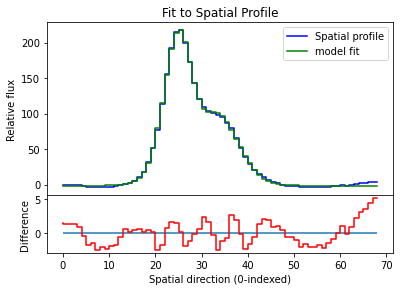

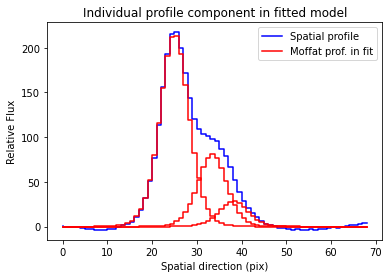

<CompoundModel(c0_0=-1.3490609, amplitude_1=215.00610976, x_0_1=25.53844646, gamma_1=10.89633803, alpha_1=6.16382695, amplitude_2=80.73905539, x_0_2=33.97726503, gamma_2=10.89633803, alpha_2=6.16382695, amplitude_3=28.61187653, x_0_3=38.73304924, gamma_3=10.89633803, alpha_3=6.16382695)>

In [32]:
def tie_pos1_moffat(model):
     return model.x_0_1 + (1.00/0.1185) # 0.77 1.12
            
def tie_pos2_moffat(model):
    return model.x_0_1 + (1.57/0.1185)

def tie_pos3_moffat(model):
    return model.x_0_4 + (1.70/0.1185)

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#spec.mod0[1].mean.tied = tie_pos3_moffat
spec.mod0[2].x_0.tied = tie_pos1_moffat
#spec.mod0[3].x_0.tied = tie_pos2_moffat
#spec.mod0[2].x_0.tied = tie_pos3_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
#spec.mod0[2].gamma.tied = tie_gamma_moffat
#spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[2].gamma.tied = tie_gamma_moffat
spec.mod0[2].alpha.tied = tie_alpha_moffat
spec.mod0[3].gamma.tied = tie_gamma_moffat
spec.mod0[3].alpha.tied = tie_alpha_moffat
spec.refined_model(spec.mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


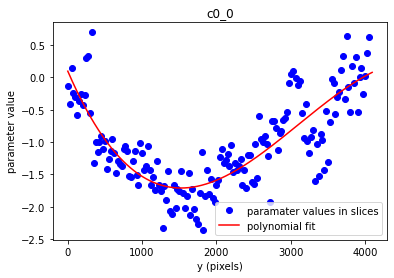

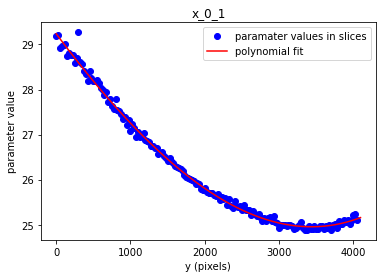

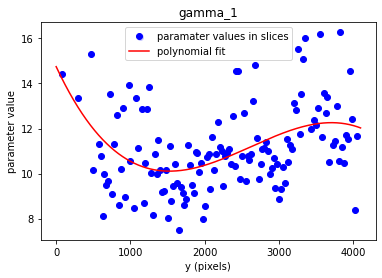

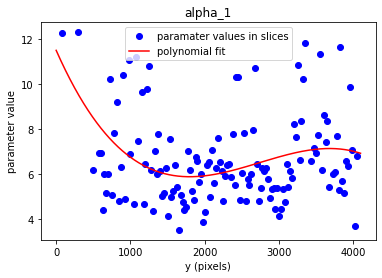

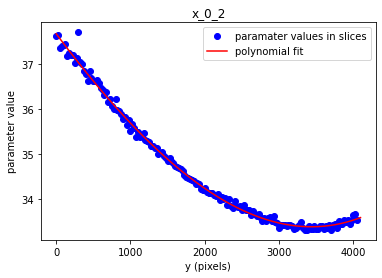

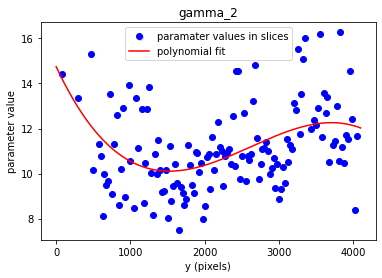

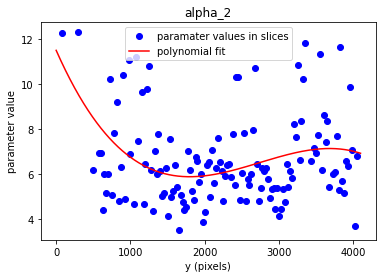

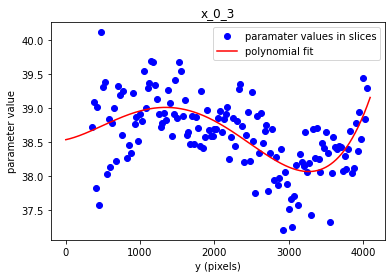

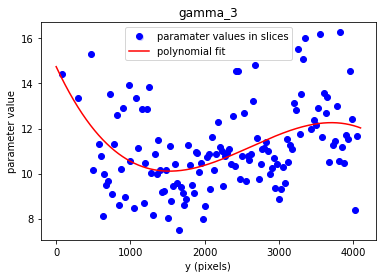

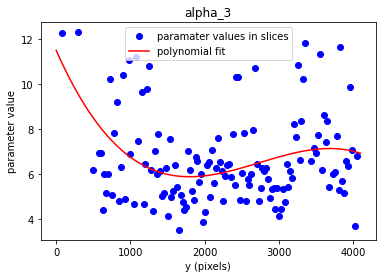

In [33]:
spec.find_and_trace(spec.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'x_0_4':4, 'mean_1':4},
                    fitrange=[0, 4100], polyorder=3)

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 10 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  4780.97
 Spectrum End:     7354.46
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  4780.97
 Spectrum End:     7354.46
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63

 Spectrum Start:  4780.97
 Spectrum End:     7354.46
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63


Plotting the spectrum


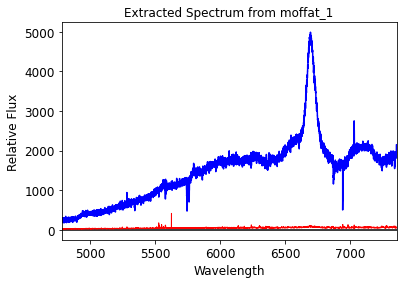

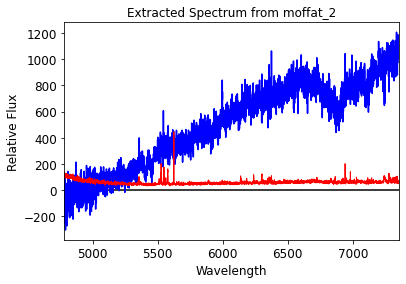

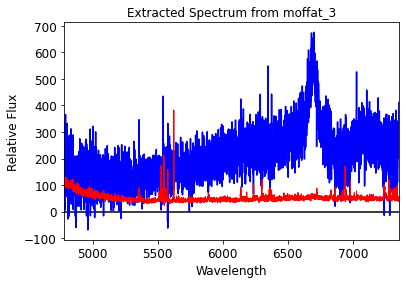

In [35]:
spec.extract(method='modelfit', extrange=[10, -1])#[1000, -1]

In [44]:
spec_d1 = spec1d.Spec1d(wav=spec.spectra[1][1]['wav'][450:], flux=spec.spectra[1][1]['flux'][450:],
                    var=spec.spectra[1][1]['var'][450:])

 Spectrum Start:  5064.25
 Spectrum End:     7354.46
 Dispersion (1st pixel):   0.63
 Dispersion (average):      0.63




Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5148.75
[Fe VII]      3761.40       5164.40
H-iota        3770.00       5176.21
H-theta       3797.00       5213.28
H-eta         3835.00       5265.45
CN bandhd     3883.00       5331.36
CaII K        3933.67       5400.93
CaII H        3968.47       5448.71
H-delta       4101.00       5630.67
G-band        4305.00       5910.77
H-gamma       4340.00       5958.82
Fe4383        4383.00       6017.86
Ca4455        4455.00       6116.72
Fe4531        4531.00       6221.06
H-beta        4861.00       6674.15
Mg I (b)      5176.00       7106.65



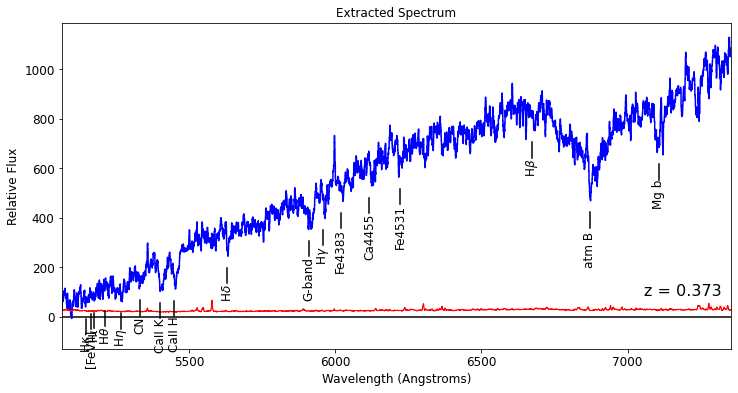

In [46]:
fg = plt.figure(figsize=(12, 6))
spec_d1.smooth(5, fig=fg)
spec_d1.mark_lines('abs', z=0.373, usesmooth=True, markatm=True, excludeline=['atm A'])
plt.savefig('spec1d_deimos_J1330+1810.pdf', dpi=200)

In [ ]:
spec2 = spec2d.Spec2d(spec2d_det7[0], hext=1, varext=2)